<a href="https://colab.research.google.com/github/Yogesh914/first_steps_into_ai_workshop_code/blob/main/workshop_lab_activity_annotated_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network Learning Handwriting

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

**`import numpy as np`**: This imports the numpy library and gives it the nickname "np". This library is a fundamental package for scientific computing with Python and provides support for arrays, among other things.

**`import torch`**: This line imports the PyTorch library. PyTorch is a popular machine learning library, used for applications such as deep learning.

**`import torch.nn as nn`**: Here we import the `nn` module from PyTorch and give it the nickname "nn". The `nn` module defines a set of functions, similar to those in the numpy module but they operate on tensors and allow for automatic differentiation.

**`import torch.optim as optim`**: This line imports the optimization module from PyTorch and gives it the nickname "optim". This module provides common optimization algorithms like gradient descent, Adam, etc.

**`import torchvision`**: This line imports the torchvision library. This library is part of the PyTorch project and it provides some utilities for working with image data, including popular datasets, model architectures, and common image transformations for computer vision.

**`import torchvision.transforms as transforms`**: Here we import the transforms module from torchvision, which provides common image transformations. These transformations can be chained together using `Compose`.

**`import matplotlib.pyplot as plt`**: This line imports the matplotlib.pyplot module and gives it the nickname "plt". This module provides functions for making plots and other graphical displays.


In [ ]:
# Load the MNIST dataset
# Let's incorporate the widely-used MNIST dataset, which consists of handwritten digit images.

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

This line creates a composition of transformations that will be applied to the images. The `ToTensor` transformation converts PIL images or numpy arrays to pytorch tensors, changing the image data from a [0, 255] range to a [0, 1] range. The `Normalize` transformation standardizes the pixel values by subtracting 0.5 (mean) and dividing by 0.5 (standard deviation) - this operation puts the data into a [-1, 1] range, which can help improve training stability and performance.

In [ ]:
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

Here, we're loading the MNIST dataset (handwritten digits) from torchvision's set of datasets. The images will be stored in './data' directory, and the `train=True` indicates that we want the training set. If the dataset is not already downloaded, it will be downloaded (`download=True`). The `transform` argument means that the transformations defined in `transform` will be applied to the images.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)

100%|██████████| 9912422/9912422 [00:00<00:00, 215255357.32it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 103712066.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 54794094.22it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6254277.34it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



This creates a DataLoader object which is a PyTorch generator that we can use to iterate over the dataset in batches. `batch_size` specifies how many samples per batch to load. `shuffle=True` shuffles the dataset before each epoch. `num_workers` is the number of sub-processes to use for data loading.

In [ ]:
# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

**`class SimpleNet(nn.Module):`**: This line begins the definition of our network architecture. In this case, it's a simple feed-forward neural network with two linear layers. It inherits from `nn.Module`, which means it will gain all the functionalities of PyTorch's module class.

**`def __init__(self):`**: This is the initializer for the `SimpleNet` class.

**`super(SimpleNet, self).__init__()`**: This line calls the initializer of the superclass `nn.Module`. This is needed to ensure that the underlying `nn.Module` is properly initialized.

**`self.fc1 = nn.Linear(28 * 28, 64)`**: This creates a linear layer (fully connected) that will take a flattened version of the input images (28*28 pixels) and output 64 values. This becomes the first layer of the network.

**`self.fc2 = nn.Linear(64, 10)`**: This creates a second linear layer that will take the 64 inputs from the previous layer and output 10 values. Since MNIST is a 10-class classification problem (digits 0-9), the final layer should have 10 outputs.

**`def forward(self, x):`**: This is the forward pass function. It takes an input tensor `x` and applies the network's operations to it to get the output.

**`x = x.view(-1, 28 * 28)`**: This reshapes the input tensor into a 2D tensor, where each row is a 28*28 (784 elements) flattened version of an image.

**`x = torch.relu(self.fc1(x))`**: The input tensor is passed through the first fully connected layer, and then the ReLU (rectified linear unit) activation function is applied. This adds some non-linearity to the model, enabling it to learn more complex patterns.

**`x = self.fc2(x)`**: The tensor is then passed through the second fully connected layer.

**`return x`**: The output of the network is returned. This will be a batch of 10-dimensional vectors, each representing the network's predictions for one image.

**`net = SimpleNet()`**: This creates an instance of the `SimpleNet` class, i.e., it creates the network.

In [ ]:
# Set loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Modify this value to experiment with different learning rates
learning_rate = 0.1

optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

**`criterion = nn.CrossEntropyLoss()`**: This line creates the criterion which will be used to calculate the loss. `CrossEntropyLoss` is often used in multi-class classification problems. It combines log-softmax and negative log-likelihood loss in one single class.

**`learning_rate = 0.1`**: This sets the learning rate for the optimizer. The learning rate determines the step size at each iteration while moving toward a minimum of a loss function.

**`optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)`**: This creates the optimizer that will be used to update the network's weights. Here we're using Stochastic Gradient Descent (SGD) with momentum.

In [ ]:
# Modify the num_epochs number and see what happens
num_epochs = 10
loss_history = []

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

**`num_epochs = 10`**: The number of epochs for which the model will be trained is set to 10. An epoch is a complete pass through the entire training dataset.

**`loss_history = []`**: An empty list is initialized to keep track of the loss at each epoch.

**`dataiter = iter(train_loader)`**: This creates an iterator object from the training data loader.

**`images, labels = next(dataiter)`**: This line uses the iterator to fetch a batch of images and their corresponding labels.

In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))

**`def imshow(img):`**: This defines a function to display an image.

**`img = img / 2 + 0.5`**: This line unnormalizes the image data, returning it to the [0, 1] range.

**`npimg = img.numpy()`**: This converts the PyTorch tensor to a numpy array.

**`plt.imshow(np.transpose(npimg, (1, 2, 0)))`**: This displays the image. The `np.transpose` function is used to rearrange the dimensions of the numpy array to match the format expected by `imshow`.

**`plt.show()`**: This command displays the plot.

**`imshow(torchvision.utils.make_grid(images))`**: This line uses the previously defined `imshow` function to display a grid of images.

In [ ]:
# Print labels
print(' '.join('%5s' % labels[j].item() for j in range(4)))

# Predict with the network
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))

**`print(' '.join('%5s' % labels[j].item() for j in range(4)))`**: This line prints the first four labels from the batch of labels. The `item` function is used to get a Python number from a tensor containing a single value.

**`outputs = net(images)`**: Here, the network is used to predict the labels for a batch of images.

**`_, predicted = torch.max(outputs, 1)`**: The `torch.max` function returns the maximum values along a given dimension of a tensor. Here it's used to get the network's predictions, which are the indices of the maximum values.

**`print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))`**: This prints the first four predictions from the batch of predictions.

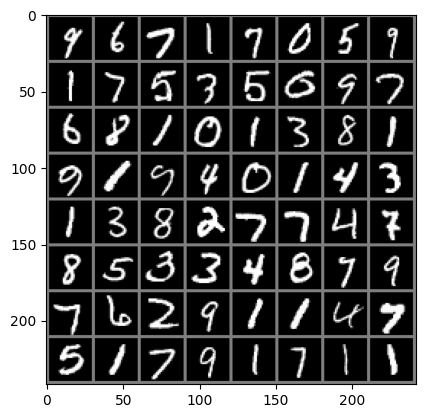

    9     6     7     1
Predicted:      0     3     0     3
First batch of epoch:  0
GroundTruth:      5     5     0     6
Predicted:      3     0     3     3


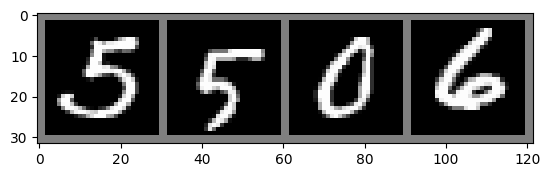

Epoch 1, Loss: 1.3336070441742187
First batch of epoch:  1
GroundTruth:      2     6     7     3
Predicted:      2     6     1     3


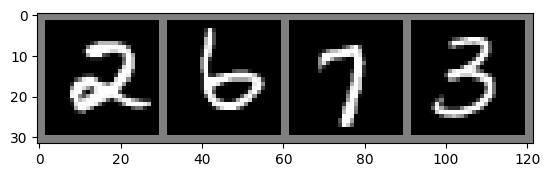

Epoch 2, Loss: 1.5190286504180193
First batch of epoch:  2
GroundTruth:      6     7     2     9
Predicted:      6     1     2     1


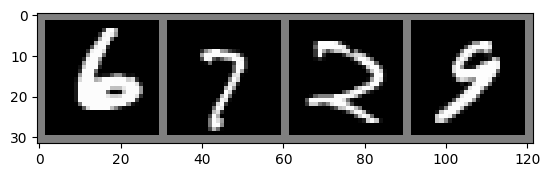

Epoch 3, Loss: 1.506460246246761
First batch of epoch:  3
GroundTruth:      7     0     4     7
Predicted:      1     0     1     7


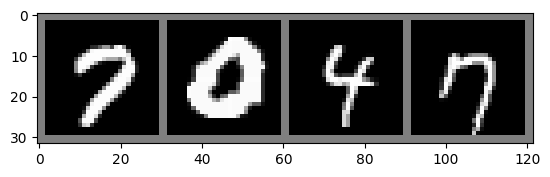

Epoch 4, Loss: 1.475618686693818
First batch of epoch:  4
GroundTruth:      1     2     5     7
Predicted:      4     2     1     1


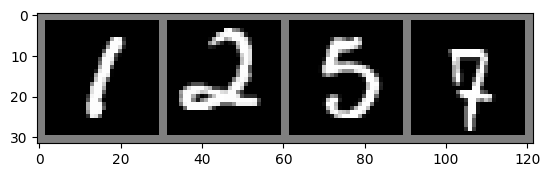

Epoch 5, Loss: 1.5069520902404907
First batch of epoch:  5
GroundTruth:      1     5     4     3
Predicted:      3     3     3     3


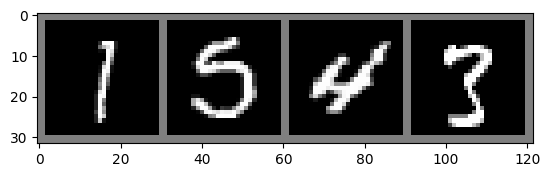

Epoch 6, Loss: 1.6724771667899354
First batch of epoch:  6
GroundTruth:      8     5     3     1
Predicted:      1     1     1     1


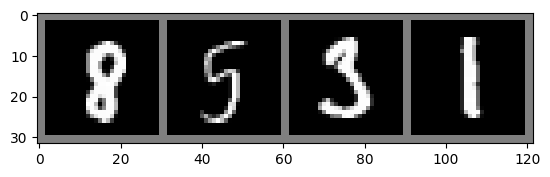

Epoch 7, Loss: 1.6625598168322273
First batch of epoch:  7
GroundTruth:      5     1     8     3
Predicted:      1     1     1     1


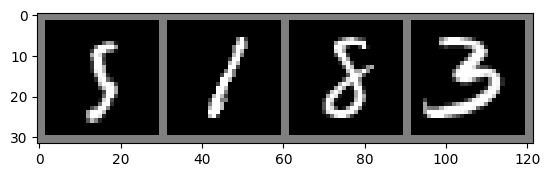

Epoch 8, Loss: 1.753262892079506
First batch of epoch:  8
GroundTruth:      3     4     9     8
Predicted:      9     9     9     9


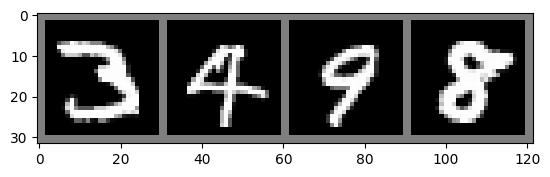

Epoch 9, Loss: 1.6704707797656435
First batch of epoch:  9
GroundTruth:      0     6     6     9
Predicted:      0     6     6     9


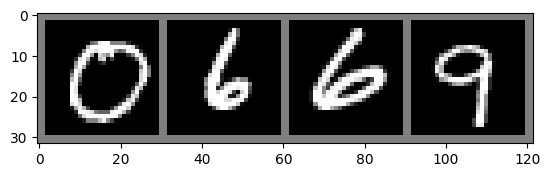

Epoch 10, Loss: 1.6167443324762112


In [ ]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Print the first 4 predicted labels of the first batch in each epoch
        if i == 0:
            _, predicted = torch.max(outputs, 1)
            print('First batch of epoch: ', epoch)
            print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))
            print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))
            imshow(torchvision.utils.make_grid(inputs[:4]))

    epoch_loss = running_loss / (i + 1)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")

**`for epoch in range(num_epochs):`**: This starts a loop over the epochs.

**`running_loss = 0.0`**: This initializes a variable to keep track of the loss.

**`for i, data in enumerate(train_loader, 0):`**: This starts a loop over the training data. For each batch of images and labels in the training data...

**`inputs, labels = data`**: ...the images and labels are unpacked.

**`optimizer.zero_grad()`**: Before the backward pass, the gradients of the network's weights are set to zero. This is because by default, gradients are accumulated in buffers.

**`outputs = net(inputs)`**: The network is used to predict the labels for the batch of images.

**`loss = criterion(outputs, labels)`**: The loss between the network's predictions and the true labels is calculated.

**`loss.backward()`**: This performs a backward pass: computes the gradient of the loss with respect to the model parameters.

**`optimizer.step()`**: This updates the model parameters based on the gradients.

**`running_loss += loss.item()`**: The loss for the current batch is added to `running_loss`.

**`if i == 0:`**: This line checks if it's the first batch in the current epoch.

**`_, predicted = torch.max(outputs, 1)`**: If it's the first batch, the network's predictions are obtained, which are the indices of the maximum values.

**`print('First batch of epoch: ', epoch)`**: The epoch number is printed.

**`print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))`**: The first four labels from the batch of labels are printed.

**`print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))`**: The first four predictions from the batch of predictions are printed.

**`imshow(torchvision.utils.make_grid(inputs[:4]))`**: The first four images from the batch of images are displayed.

**`epoch_loss = running_loss / (i + 1)`**: The average loss for the epoch is calculated by dividing the running loss by the number of batches.

**`loss_history.append(epoch_loss)`**: The average loss for the epoch is added to the list of losses.

**`print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")`**: The epoch number and loss are printed.

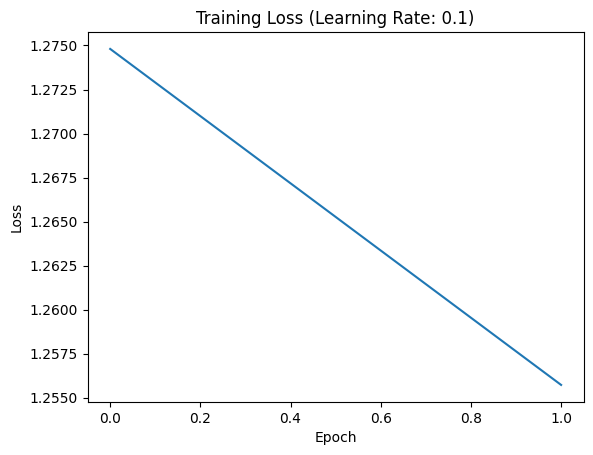

In [ ]:
# Visualize the training loss
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training Loss (Learning Rate: {learning_rate})')
plt.show()

**`plt.plot(loss_history)`**: The history of losses is plotted.

**`plt.xlabel('Epoch')`**: The x-axis label of the plot is set to 'Epoch'.

**`plt.ylabel('Loss')`**: The y-axis label of the plot is set to 'Loss'.

**`plt.title(f'Training Loss (Learning Rate: {learning_rate})')`**: The title of the plot is set to 'Training Loss' and it also includes the learning rate.

**`plt.show()`**: The plot is displayed.